<a href="https://colab.research.google.com/github/AS2017521upeksha/ML1_Project/blob/main/model_training_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#load cs file to pandas dataframe
df = pd.read_csv("moviedata.csv")
df.head(10)


,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget
0,Gladiator,2000,8.5,Ridley Scott,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Action,155,David Franzoni,DreamWorks,USA,SDDS,103000000.0
1,Memento,2000,8.4,Christopher Nolan,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mark Boone Junior,Mystery,113,Christopher Nolan,NewmarketCapitalGroup,USALanguage,DolbyDigitalColor,9000000.0
2,Snatch,2000,8.3,Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,Comedy,102,Guy Ritchie,ColumbiaPictures,UK,DolbyDigital,0.0
3,Requiem for a Dream,2000,8.3,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,Drama,102,Hubert Selby Jr.,ArtisanEntertainment,USALanguage,DolbyDigitalColor,4500000.0
4,X-Men,2000,7.4,Bryan Singer,Patrick Stewart,Hugh Jackman,Ian McKellen,Famke Janssen,Action,104,Tom DeSanto,TwentiethCenturyFox,USALanguage,DTS,75000000.0
5,Cast Away,2000,7.8,Robert Zemeckis,Tom Hanks,Helen Hunt,Paul Sanchez,Lari White,Adventure,143,William Broyles Jr.,TwentiethCenturyFox,USALanguage,SDDS,90000000.0
6,American Psycho,2000,7.6,Mary Harron,Christian Bale,Justin Theroux,Josh Lucas,Bill Sage,Comedy,101,Bret Easton Ellis,AmPsychoProductions,USA,DolbyDigital,7000000.0
7,Unbreakable,2000,7.3,M. Night Shyamalan,Bruce Willis,Samuel L. Jackson,Robin Wright,Spencer Treat Clark,Drama,106,M. Night Shyamalan,TouchstonePictures,USALanguage,DolbyDigitalEX,75000000.0
8,Mission: Impossible II,2000,6.1,John Woo,Tom Cruise,Dougray Scott,Thandie Newton,Ving Rhames,Action,123,Bruce Geller,ParamountPictures,USA,DTS,125000000.0
9,Meet the Parents,2000,7.0,Jay Roach,Ben Stiller,Robert De Niro,Teri Polo,Blythe Danner,Comedy,108,Greg Glienna,UniversalPictures,USALanguage,DTS,55000000.0


### **PREPROSSESING DATA**

In [ ]:
#get count of rows and columns
df.shape             

(862, 15)

In [ ]:
#remove rows which contain production_house = NA
df = df[df.production_house != "NA"]      
df.shape

(862, 15)

In [ ]:
#remove rows which contain country = NA
df = df[df.country != "NA"]
df.shape

(862, 15)

In [ ]:
#remove rows which contains sounds = NA
df = df[df.sounds != "NA"]
df.shape

(862, 15)

In [ ]:
#remove rows which contains budget = 0
df = df[df.budget != 0]
df.shape

(862, 15)

In [ ]:
#remove rows with null values
df = df.dropna()
df.shape

(862, 15)

In [ ]:
#remove all the duplicates rows
df=df.drop_duplicates()
df.shape

(862, 15)

In [ ]:
df.tail(10)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget
406,Hero,2002,7.9,Yimou Zhang,Jet Li,Tony Chiu-Wai Leung,Maggie Cheung,Ziyi Zhang,Action,107,Feng Li,BeijingNewPictureFilmCo,China,DTS,31000000.0
3305,The Favourite,2018,7.6,Yorgos Lanthimos,Olivia Colman,Emma Stone,Rachel Weisz,Nicholas Hoult,Biography,119,Deborah Davis,FoxSearchlightPictures,Ireland,DolbyDigitalColor,15000000.0
798,Garden State,2004,7.4,Zach Braff,Zach Braff,Peter Sarsgaard,Natalie Portman,Ian Holm,Comedy,102,Zach Braff,CamelotPictures,USALanguage,DTS,2500000.0
1114,300,2006,7.6,Zack Snyder,Gerard Butler,Lena Headey,David Wenham,Dominic West,Action,117,Zack Snyder,WarnerBros,USA,Sonics,65000000.0
2050,Sucker Punch,2011,6.0,Zack Snyder,Emily Browning,Vanessa Hudgens,Abbie Cornish,Jena Malone,Action,110,Zack Snyder,WarnerBros,USA,DolbyDigital,82000000.0
2391,Man of Steel,2013,7.1,Zack Snyder,Henry Cavill,Amy Adams,Michael Shannon,Diane Lane,Action,143,David S. Goyer,WarnerBros,USA,DolbyDigital,225000000.0
1660,Watchmen,2009,7.6,Zack Snyder,Jackie Earle Haley,Patrick Wilson,Carla Gugino,Malin Akerman,Action,162,David Hayter,WarnerBros,USALanguage,SDDS,130000000.0
2922,Batman v Superman: Dawn of Justice,2016,6.5,Zack Snyder,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Action,151,Chris Terrio,WarnerBros,USALanguage,DolbyAtmos,250000000.0
3120,Justice League,2017,6.4,Zack Snyder,Ben Affleck,Gal Gadot,Jason Momoa,Ezra Miller,Action,120,Jerry Siegel,WarnerBros,USA,DolbyDigital,300000000.0
793,Dawn of the Dead,2004,7.3,Zack Snyder,Sarah Polley,Ving Rhames,Mekhi Phifer,Jake Weber,Action,101,George A. Romero,StrikeEntertainment,USA,DTS,26000000.0


In [ ]:
df = df.sort_values('director_name' , ascending = True)
df.tail(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget
2050,Sucker Punch,2011,6.0,Zack Snyder,Emily Browning,Vanessa Hudgens,Abbie Cornish,Jena Malone,Action,110,Zack Snyder,WarnerBros,USA,DolbyDigital,82000000.0
2391,Man of Steel,2013,7.1,Zack Snyder,Henry Cavill,Amy Adams,Michael Shannon,Diane Lane,Action,143,David S. Goyer,WarnerBros,USA,DolbyDigital,225000000.0
1660,Watchmen,2009,7.6,Zack Snyder,Jackie Earle Haley,Patrick Wilson,Carla Gugino,Malin Akerman,Action,162,David Hayter,WarnerBros,USALanguage,SDDS,130000000.0
2922,Batman v Superman: Dawn of Justice,2016,6.5,Zack Snyder,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Action,151,Chris Terrio,WarnerBros,USALanguage,DolbyAtmos,250000000.0
793,Dawn of the Dead,2004,7.3,Zack Snyder,Sarah Polley,Ving Rhames,Mekhi Phifer,Jake Weber,Action,101,George A. Romero,StrikeEntertainment,USA,DTS,26000000.0


In [ ]:
# make another dataframe with consudring director' performance
dr_name = []
g1 = df.groupby('director_name')
for name, group in g1:
  dr_name.append(name)

dr_tot = df.groupby('director_name')['imdb'].count()

high_ratings_films_of_director = df[df['imdb'] >= 7].groupby('director_name')['imdb'].count()

low_ratings_films_of_director = df[df['imdb']< 7].groupby('director_name')['imdb'].count()

mean_of_director = df.groupby('director_name')['imdb'].mean()

high_ratings_mean_of_director = df[df['imdb'] >= 7].groupby('director_name')['imdb'].mean()

low_ratings_mean_of_director = df[df['imdb']< 7].groupby('director_name')['imdb'].mean()

df1 = pd.DataFrame({'director_name' :dr_name ,
                                         '65%_of_dr_total' :dr_tot*0.65,
                                         'high_ratings_film_dir' :high_ratings_films_of_director,
                                         'law_ratings_film_dir' :low_ratings_films_of_director,
                                         'mean_of_dir-[7-10]' :high_ratings_mean_of_director,
                                         'mean_of_dir-[0-7]' :low_ratings_mean_of_director,
                                         'mean_of_dir' :mean_of_director
                                         })
df1.reset_index(drop=True, inplace=True)
df1

,director_name,65%_of_dr_total,high_ratings_film_dir,law_ratings_film_dir,mean_of_dir-[7-10],mean_of_dir-[0-7],mean_of_dir
0,Adam McKay,3.90,3.0,3.0,7.400000,6.70,7.050000
1,Adam Shankman,0.65,1.0,NaN,7.400000,NaN,7.400000
2,Alan Taylor,1.30,NaN,2.0,NaN,6.65,6.650000
3,Albert Hughes,1.30,NaN,2.0,NaN,6.85,6.850000
4,Alejandro Amenábar,0.65,1.0,NaN,7.600000,NaN,7.600000
...,...,...,...,...,...,...,...
408,Woody Allen,1.95,3.0,NaN,7.466667,NaN,7.466667
409,Yimou Zhang,0.65,1.0,NaN,7.900000,NaN,7.900000
410,Yorgos Lanthimos,0.65,1.0,NaN,7.600000,NaN,7.600000
411,Zach Braff,0.65,1.0,NaN,7.400000,NaN,7.400000


In [ ]:
df1.describe()

,65%_of_dr_total,high_ratings_film_dir,law_ratings_film_dir,mean_of_dir-[7-10],mean_of_dir-[0-7],mean_of_dir
count,413.000000,281.000000,231.000000,281.000000,231.000000,413.000000
mean,1.356659,1.818505,1.519481,7.544859,6.375884,7.045889
std,1.083531,1.388401,0.868938,0.355393,0.424914,0.668609
min,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000
25%,0.650000,1.000000,1.000000,7.250000,6.200000,6.600000
50%,0.650000,1.000000,1.000000,7.533333,6.450000,7.100000
75%,1.950000,2.000000,2.000000,7.800000,6.700000,7.550000
max,7.150000,9.000000,8.000000,8.600000,6.900000,8.600000


In [ ]:
df=df.merge(df1)
df.head(5)


,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,65%_of_dr_total,high_ratings_film_dir,law_ratings_film_dir,mean_of_dir-[7-10],mean_of_dir-[0-7],mean_of_dir
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,3.9,3.0,3.0,7.4,6.7,7.05
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,3.9,3.0,3.0,7.4,6.7,7.05
2,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,3.9,3.0,3.0,7.4,6.7,7.05
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,3.9,3.0,3.0,7.4,6.7,7.05
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,3.9,3.0,3.0,7.4,6.7,7.05


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   director_name          413 non-null    object 
 1   65%_of_dr_total        413 non-null    float64
 2   high_ratings_film_dir  281 non-null    float64
 3   law_ratings_film_dir   231 non-null    float64
 4   mean_of_dir-[7-10]     281 non-null    float64
 5   mean_of_dir-[0-7]      231 non-null    float64
 6   mean_of_dir            413 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.7+ KB


In [ ]:
df.describe()

,imdb,run_time,budget,65%_of_dr_total,high_ratings_film_dir,law_ratings_film_dir,mean_of_dir-[7-10],mean_of_dir-[0-7],mean_of_dir
count,862.000000,862.000000,8.620000e+02,862.000000,682.000000,563.000000,682.000000,563.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,2.219954,2.717009,1.937833,7.544954,6.407334,7.093039
std,0.738488,19.844476,6.487956e+07,1.548945,1.950331,1.202625,0.331919,0.376986,0.604697
min,4.100000,77.000000,1.500000e+04,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,0.650000,1.000000,1.000000,7.300000,6.225000,6.750000
50%,7.100000,117.000000,6.000000e+07,1.950000,2.000000,2.000000,7.533333,6.475000,7.150000
75%,7.600000,130.000000,1.200000e+08,3.250000,3.000000,2.000000,7.774107,6.700000,7.483333
max,9.000000,209.000000,3.560000e+08,7.150000,9.000000,8.000000,8.600000,6.900000,8.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie                  862 non-null    object 
 1   year                   862 non-null    object 
 2   imdb                   862 non-null    float64
 3   director_name          862 non-null    object 
 4   actor_1_name           862 non-null    object 
 5   actor_2_name           862 non-null    object 
 6   actor_3_name           862 non-null    object 
 7   actor_4_name           862 non-null    object 
 8   gener                  862 non-null    object 
 9   run_time               862 non-null    int64  
 10  writer                 862 non-null    object 
 11  production_house       862 non-null    object 
 12  country                862 non-null    object 
 13  sounds                 862 non-null    object 
 14  budget                 862 non-null    float64
 15  65%_of

In [ ]:
# to get the most suitable imdb rating for director used some conditions
import numpy as np
conditions = [df['high_ratings_film_dir'] >= df['65%_of_dr_total'],
              df['law_ratings_film_dir'] >= df['65%_of_dr_total'],
              ]
choices = [df['mean_of_dir-[7-10]'], df['mean_of_dir-[0-7]']]
df['exact_mean_dir'] = np.select(conditions,choices,default = df['mean_of_dir'])
df.head(10)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,65%_of_dr_total,high_ratings_film_dir,law_ratings_film_dir,mean_of_dir-[7-10],mean_of_dir-[0-7],mean_of_dir,exact_mean_dir
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
2,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
5,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,3.90,3.0,3.0,7.4,6.70,7.05,7.05
6,A Walk to Remember,2002,7.4,Adam Shankman,Mandy Moore,Shane West,Peter Coyote,Daryl Hannah,Drama,101,Nicholas Sparks,WarnerBros,USALanguage,DTS,11800000.0,0.65,1.0,NaN,7.4,NaN,7.40,7.40
7,Thor: The Dark World,2013,6.9,Alan Taylor,Chris Hemsworth,Natalie Portman,Tom Hiddleston,Stellan Skarsgård,Action,112,Christopher L. Yost,MarvelStudios,USALanguage,DolbyDigital,170000000.0,1.30,NaN,2.0,NaN,6.65,6.65,6.65
8,Terminator Genisys,2015,6.4,Alan Taylor,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,Action,126,Laeta Kalogridis,ParamountPictures,USALanguage,DolbyDigital,155000000.0,1.30,NaN,2.0,NaN,6.65,6.65,6.65
9,From Hell,2001,6.8,Albert Hughes,Allen Hughes,Johnny Depp,Heather Graham,Ian Holm,Horror,122,Alan Moore,TwentiethCenturyFox,USALanguage,DolbyColor,35000000.0,1.30,NaN,2.0,NaN,6.85,6.85,6.85


In [ ]:
#after calculating imdb rating for director remove unnessary data columns
df=df.drop(['65%_of_dr_total','high_ratings_film_dir','law_ratings_film_dir','mean_of_dir-[7-10]','mean_of_dir-[0-7]','mean_of_dir'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             862 non-null    object 
 1   year              862 non-null    object 
 2   imdb              862 non-null    float64
 3   director_name     862 non-null    object 
 4   actor_1_name      862 non-null    object 
 5   actor_2_name      862 non-null    object 
 6   actor_3_name      862 non-null    object 
 7   actor_4_name      862 non-null    object 
 8   gener             862 non-null    object 
 9   run_time          862 non-null    int64  
 10  writer            862 non-null    object 
 11  production_house  862 non-null    object 
 12  country           862 non-null    object 
 13  sounds            862 non-null    object 
 14  budget            862 non-null    float64
 15  exact_mean_dir    862 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory u

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir
count,862.000000,862.000000,8.620000e+02,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525
std,0.738488,19.844476,6.487956e+07,0.658302
min,4.100000,77.000000,1.500000e+04,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000
50%,7.100000,117.000000,6.000000e+07,7.200000
75%,7.600000,130.000000,1.200000e+08,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000


In [ ]:
#make another data frame with cosidering producer's performance
pr_name = []
g1 = df.groupby('production_house')
for name, group in g1:
  pr_name.append(name)

pr_tot = df.groupby('production_house')['imdb'].count()

high_ratings_films_of_pr = df[df['imdb'] >= 7].groupby('production_house')['imdb'].count()

low_ratings_films_of_pr = df[df['imdb']< 7].groupby('production_house')['imdb'].count()

mean_of_pr = df.groupby('production_house')['imdb'].mean()

high_ratings_mean_of_pr = df[df['imdb'] >= 7].groupby('production_house')['imdb'].mean()

low_ratings_mean_of_pr = df[df['imdb']< 7].groupby('production_house')['imdb'].mean()

df2 = pd.DataFrame({'production_house' :pr_name ,
                                     '65%_of_pr_total' :pr_tot*0.65,
                                     'high_ratings_film_pr' :high_ratings_films_of_pr,
                                     'low_ratings_film_pr' :low_ratings_films_of_pr,
                                     'mean_of_pr-[7-10]' :high_ratings_mean_of_pr,
                                     'mean_of_pr-[0-7]' :low_ratings_mean_of_pr,
                                     'mean_of_pr' :mean_of_pr
                                         })
df2.reset_index(drop=True,inplace=True)
df2

,production_house,65%_of_pr_total,high_ratings_film_pr,low_ratings_film_pr,mean_of_pr-[7-10],mean_of_pr-[0-7],mean_of_pr
0,A,1.30,2.0,NaN,7.35,NaN,7.35
1,AI,0.65,1.0,NaN,7.50,NaN,7.50
2,AMAssociates,0.65,1.0,NaN,7.60,NaN,7.60
3,AardmanAnimations,0.65,1.0,NaN,7.00,NaN,7.00
4,AcaciaFilmedEntertainment,0.65,1.0,NaN,7.70,NaN,7.70
...,...,...,...,...,...,...,...
217,Wiedemann,0.65,1.0,NaN,8.40,NaN,8.40
218,WildBunch,0.65,1.0,NaN,7.90,NaN,7.90
219,WorkingTitleFilms,1.95,3.0,NaN,7.30,NaN,7.30
220,YellowBird,0.65,1.0,NaN,7.80,NaN,7.80


In [ ]:
df=df.merge(df2)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,65%_of_pr_total,high_ratings_film_pr,low_ratings_film_pr,mean_of_pr-[7-10],mean_of_pr-[0-7],mean_of_pr
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,1.3,1.0,1.0,7.200000,6.100000,6.650000
1,Sausage Party,2016,6.1,Greg Tiernan,Conrad Vernon,Seth Rogen,Kristen Wiig,Jonah Hill,Animation,89,Kyle Hunter,AnnapurnaPictures,USA,DolbyDigital,19000000.0,6.10,1.3,1.0,1.0,7.200000,6.100000,6.650000
2,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,48.1,31.0,43.0,7.425806,6.334884,6.791892
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,48.1,31.0,43.0,7.425806,6.334884,6.791892
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,48.1,31.0,43.0,7.425806,6.334884,6.791892


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,65%_of_pr_total,high_ratings_film_pr,low_ratings_film_pr,mean_of_pr-[7-10],mean_of_pr-[0-7],mean_of_pr
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,800.000000,705.000000,800.000000,705.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,23.119490,20.771250,19.919149,7.564065,6.366789,7.093039
std,0.738488,19.844476,6.487956e+07,0.658302,21.365722,18.128492,15.170920,0.210604,0.344688,0.423954
min,4.100000,77.000000,1.500000e+04,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.700000
25%,6.600000,105.000000,2.900000e+07,6.700000,1.950000,3.000000,3.000000,7.425806,6.246154,6.841071
50%,7.100000,117.000000,6.000000e+07,7.200000,18.200000,14.000000,26.000000,7.525926,6.380645,7.024138
75%,7.600000,130.000000,1.200000e+08,7.600000,48.100000,33.000000,31.000000,7.642857,6.500000,7.250000
max,9.000000,209.000000,3.560000e+08,8.600000,56.550000,56.000000,43.000000,8.600000,6.900000,8.600000


In [ ]:
# to get the most suitable imdb rating for producer used some conditions
conditions = [df['high_ratings_film_pr'] >= df['65%_of_pr_total'],
              df['low_ratings_film_pr'] >= df['65%_of_pr_total'],
              ]
choices = [df['mean_of_pr-[7-10]'], df['mean_of_pr-[0-7]']]
df['exact_mean_pro'] = np.select(conditions,choices,default = df['mean_of_pr'])
df.head(10)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,65%_of_pr_total,high_ratings_film_pr,low_ratings_film_pr,mean_of_pr-[7-10],mean_of_pr-[0-7],mean_of_pr,exact_mean_pro
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,1.3,1.0,1.0,7.200000,6.100000,6.650000,6.650000
1,Sausage Party,2016,6.1,Greg Tiernan,Conrad Vernon,Seth Rogen,Kristen Wiig,Jonah Hill,Animation,89,Kyle Hunter,AnnapurnaPictures,USA,DolbyDigital,19000000.0,6.100000,1.3,1.0,1.0,7.200000,6.100000,6.650000,6.650000
2,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.050000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.050000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.050000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
5,Hitch,I 2005,6.6,Andy Tennant,Will Smith,Eva Mendes,Kevin James,Amber Valletta,Comedy,118,Kevin Bisch,ColumbiaPictures,USALanguage,DTS,70000000.0,6.600000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
6,The Equalizer,2014,7.2,Antoine Fuqua,Denzel Washington,Marton Csokas,Chloë Grace Moretz,David Harbour,Action,132,Richard Wenk,ColumbiaPictures,USALanguage,SDDS,55000000.0,7.085714,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
7,The Equalizer 2,2018,6.7,Antoine Fuqua,Denzel Washington,Pedro Pascal,Ashton Sanders,Orson Bean,Action,121,Richard Wenk,ColumbiaPictures,USALanguage,DolbySurround,62000000.0,7.085714,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
8,Men in Black 3,2012,6.8,Barry Sonnenfeld,Will Smith,Tommy Lee Jones,Josh Brolin,Jemaine Clement,Action,106,Etan Cohen,ColumbiaPictures,USA,DolbyDigital,225000000.0,6.500000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892
9,Men in Black II,2002,6.2,Barry Sonnenfeld,Tommy Lee Jones,Will Smith,Rip Torn,Lara Flynn Boyle,Action,88,Lowell Cunningham,ColumbiaPictures,USALanguage,DTS,140000000.0,6.500000,48.1,31.0,43.0,7.425806,6.334884,6.791892,6.791892


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,65%_of_pr_total,high_ratings_film_pr,low_ratings_film_pr,mean_of_pr-[7-10],mean_of_pr-[0-7],mean_of_pr,exact_mean_pro
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,800.000000,705.000000,800.000000,705.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,23.119490,20.771250,19.919149,7.564065,6.366789,7.093039,7.111873
std,0.738488,19.844476,6.487956e+07,0.658302,21.365722,18.128492,15.170920,0.210604,0.344688,0.423954,0.452375
min,4.100000,77.000000,1.500000e+04,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.700000,4.700000
25%,6.600000,105.000000,2.900000e+07,6.700000,1.950000,3.000000,3.000000,7.425806,6.246154,6.841071,6.841071
50%,7.100000,117.000000,6.000000e+07,7.200000,18.200000,14.000000,26.000000,7.525926,6.380645,7.024138,7.024138
75%,7.600000,130.000000,1.200000e+08,7.600000,48.100000,33.000000,31.000000,7.642857,6.500000,7.250000,7.400000
max,9.000000,209.000000,3.560000e+08,8.600000,56.550000,56.000000,43.000000,8.600000,6.900000,8.600000,8.600000


In [ ]:
#after calculating imdb rating for producer remove unnessary data columns
df=df.drop(['65%_of_pr_total','high_ratings_film_pr','low_ratings_film_pr','mean_of_pr-[7-10]','mean_of_pr-[0-7]','mean_of_pr'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             862 non-null    object 
 1   year              862 non-null    object 
 2   imdb              862 non-null    float64
 3   director_name     862 non-null    object 
 4   actor_1_name      862 non-null    object 
 5   actor_2_name      862 non-null    object 
 6   actor_3_name      862 non-null    object 
 7   actor_4_name      862 non-null    object 
 8   gener             862 non-null    object 
 9   run_time          862 non-null    int64  
 10  writer            862 non-null    object 
 11  production_house  862 non-null    object 
 12  country           862 non-null    object 
 13  sounds            862 non-null    object 
 14  budget            862 non-null    float64
 15  exact_mean_dir    862 non-null    float64
 16  exact_mean_pro    862 non-null    float64
dt

In [ ]:
#make another data frame with cosidering actor_1's performance
ac1_name = []
g1 = df.groupby('actor_1_name')
for name, group in g1:
  ac1_name.append(name)

ac1_tot = df.groupby('actor_1_name')['imdb'].count()

high_ratings_films_of_ac1 = df[df['imdb'] >= 7].groupby('actor_1_name')['imdb'].count()

low_ratings_films_of_ac1 = df[df['imdb']< 7].groupby('actor_1_name')['imdb'].count()

mean_of_ac1 = df.groupby('actor_1_name')['imdb'].mean()

high_ratings_mean_of_ac1 = df[df['imdb'] >= 7].groupby('actor_1_name')['imdb'].mean()

low_ratings_mean_of_ac1 = df[df['imdb']< 7].groupby('actor_1_name')['imdb'].mean()

df3 = pd.DataFrame({'actor_1_name' :ac1_name,
                                    '65%_of_ac1_total' :ac1_tot*0.65,
                                     'high_ratings_film_ac1' :high_ratings_films_of_ac1,
                                     'low_ratings_film_ac1' :low_ratings_films_of_ac1,
                                     'mean_of_ac1-[7-10]' :high_ratings_mean_of_ac1,
                                     'mean_of_ac1-[0-7]' :low_ratings_mean_of_ac1,
                                     'mean_of_ac1' :mean_of_ac1
                                      })
df3.reset_index(drop=True,inplace=True)
df3

,actor_1_name,65%_of_ac1_total,high_ratings_film_ac1,low_ratings_film_ac1,mean_of_ac1-[7-10],mean_of_ac1-[0-7],mean_of_ac1
0,A.J. Cook,0.65,NaN,1.0,NaN,6.200000,6.200000
1,Aaron Eckhart,0.65,1.0,NaN,7.6,NaN,7.600000
2,Aaron Taylor-Johnson,1.95,1.0,2.0,7.6,6.450000,6.833333
3,Adam Sandler,5.85,2.0,7.0,7.2,6.171429,6.400000
4,Adrian Molina,0.65,1.0,NaN,8.4,NaN,8.400000
...,...,...,...,...,...,...,...
409,Zac Efron,0.65,NaN,1.0,NaN,6.300000,6.300000
410,Zach Braff,0.65,1.0,NaN,7.4,NaN,7.400000
411,Zach Galifianakis,0.65,1.0,NaN,7.7,NaN,7.700000
412,Zachary Levi,0.65,1.0,NaN,7.1,NaN,7.100000


In [ ]:
df=df.merge(df3)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,65%_of_ac1_total,high_ratings_film_ac1,low_ratings_film_ac1,mean_of_ac1-[7-10],mean_of_ac1-[0-7],mean_of_ac1
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.8,11.0,1.0,7.818182,6.5,7.708333
1,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.8,11.0,1.0,7.818182,6.5,7.708333
2,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,7.050000,6.900000,7.8,11.0,1.0,7.818182,6.5,7.708333
3,The Dark Knight,2008,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,152,Jonathan Nolan,WarnerBros,USA,DolbyDigital,185000000.0,8.333333,7.193103,7.8,11.0,1.0,7.818182,6.5,7.708333
4,The Dark Knight Rises,2012,8.4,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Action,164,Jonathan Nolan,WarnerBros,UK,SDDS,250000000.0,8.333333,7.193103,7.8,11.0,1.0,7.818182,6.5,7.708333


In [ ]:
# to get the most suitable imdb rating for actor_1 used some conditions
conditions = [df['high_ratings_film_ac1'] >= df['65%_of_ac1_total'],
              df['low_ratings_film_ac1'] >= df['65%_of_ac1_total'],
              ]
choices = [df['mean_of_ac1-[7-10]'], df['mean_of_ac1-[0-7]']]
df['exact_mean_ac1'] = np.select(conditions,choices,default = df['mean_of_ac1'])
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,65%_of_ac1_total,high_ratings_film_ac1,low_ratings_film_ac1,mean_of_ac1-[7-10],mean_of_ac1-[0-7],mean_of_ac1,exact_mean_ac1
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.8,11.0,1.0,7.818182,6.5,7.708333,7.818182
1,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.8,11.0,1.0,7.818182,6.5,7.708333,7.818182
2,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,7.050000,6.900000,7.8,11.0,1.0,7.818182,6.5,7.708333,7.818182
3,The Dark Knight,2008,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,152,Jonathan Nolan,WarnerBros,USA,DolbyDigital,185000000.0,8.333333,7.193103,7.8,11.0,1.0,7.818182,6.5,7.708333,7.818182
4,The Dark Knight Rises,2012,8.4,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Action,164,Jonathan Nolan,WarnerBros,UK,SDDS,250000000.0,8.333333,7.193103,7.8,11.0,1.0,7.818182,6.5,7.708333,7.818182


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,65%_of_ac1_total,high_ratings_film_ac1,low_ratings_film_ac1,mean_of_ac1-[7-10],mean_of_ac1-[0-7],mean_of_ac1,exact_mean_ac1
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,716.000000,603.000000,716.000000,603.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,2.954408,3.241620,2.648425,7.560058,6.421716,7.093039,7.099977
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,2.686121,3.031582,1.954408,0.331552,0.340741,0.589587,0.656524
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,0.650000,1.000000,1.000000,7.333333,6.262500,6.790625,6.700000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,1.950000,2.000000,2.000000,7.533333,6.500000,7.100000,7.100000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,4.550000,4.000000,4.000000,7.760000,6.650000,7.475000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,11.050000,13.000000,8.000000,8.800000,6.900000,8.800000,8.800000


In [ ]:
#after calculating imdb rating for actor_1 remove unnessary data columns
df=df.drop(['65%_of_ac1_total','high_ratings_film_ac1','low_ratings_film_ac1','mean_of_ac1-[7-10]','mean_of_ac1-[0-7]','mean_of_ac1'],axis=1)

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000


In [ ]:
df.shape

(862, 18)

In [ ]:
#make another data frame with cosidering actor_2's performance
ac2_name = []
g1 = df.groupby('actor_2_name')
for name, group in g1:
  ac2_name.append(name)

ac2_tot = df.groupby('actor_2_name')['imdb'].count()

high_ratings_films_of_ac2 = df[df['imdb'] >= 7].groupby('actor_2_name')['imdb'].count()

low_ratings_films_of_ac2 = df[df['imdb']< 7].groupby('actor_2_name')['imdb'].count()

mean_of_ac2 = df.groupby('actor_2_name')['imdb'].mean()

high_ratings_mean_of_ac2 = df[df['imdb'] >= 7].groupby('actor_2_name')['imdb'].mean()

low_ratings_mean_of_ac2 = df[df['imdb']< 7].groupby('actor_2_name')['imdb'].mean()

df4 = pd.DataFrame({'actor_2_name' :ac2_name,
                                    '65%_of_ac2_total' :ac2_tot*0.65,
                                     'high_ratings_film_ac2' :high_ratings_films_of_ac2,
                                     'low_ratings_film_ac2' :low_ratings_films_of_ac2,
                                     'mean_of_ac2-[7-10]' :high_ratings_mean_of_ac2,
                                     'mean_of_ac2-[0-7]' :low_ratings_mean_of_ac2,
                                     'mean_of_ac2' :mean_of_ac2
                                      })
df4.reset_index(drop=True,inplace=True)
df4

,actor_2_name,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2
0,AJ Michalka,0.65,1.0,NaN,7.000000,NaN,7.000000
1,Aaron Eckhart,1.30,1.0,1.0,7.400000,6.500000,6.950000
2,Adam Driver,0.65,1.0,NaN,7.500000,NaN,7.500000
3,Adam Garcia,0.65,NaN,1.0,NaN,5.700000,5.700000
4,Adam Sandler,0.65,NaN,1.0,NaN,6.200000,6.200000
...,...,...,...,...,...,...,...
548,Zach Galifianakis,2.60,1.0,3.0,7.700000,6.233333,6.600000
549,Zachary Quinto,1.95,3.0,NaN,7.566667,NaN,7.566667
550,Zachery Ty Bryan,0.65,NaN,1.0,NaN,6.000000,6.000000
551,Zoe Saldana,1.30,2.0,NaN,7.700000,NaN,7.700000


In [ ]:
df=df.merge(df4)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375
1,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.818182,2.60,4.0,NaN,7.375,NaN,7.375
2,Man of Steel,2013,7.1,Zack Snyder,Henry Cavill,Amy Adams,Michael Shannon,Diane Lane,Action,143,David S. Goyer,WarnerBros,USA,DolbyDigital,225000000.0,6.928571,7.193103,7.200000,2.60,4.0,NaN,7.375,NaN,7.375
3,Her,2013,8.0,Spike Jonze,Joaquin Phoenix,Amy Adams,Scarlett Johansson,Rooney Mara,Drama,126,Spike Jonze,AnnapurnaPicturesSeemore,USALanguage,SDDS,23000000.0,7.850000,8.000000,8.133333,2.60,4.0,NaN,7.375,NaN,7.375
4,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,7.050000,6.900000,7.818182,3.25,5.0,NaN,7.580,NaN,7.580


In [ ]:
# to get the most suitable imdb rating for actor_2 used some conditions
conditions = [df['high_ratings_film_ac2'] >= df['65%_of_ac2_total'],
              df['low_ratings_film_ac2'] >= df['65%_of_ac2_total'],
              ]
choices = [df['mean_of_ac2-[7-10]'], df['mean_of_ac2-[0-7]']]
df['exact_mean_ac2'] = np.select(conditions,choices,default = df['mean_of_ac2'])
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375
1,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375
2,Man of Steel,2013,7.1,Zack Snyder,Henry Cavill,Amy Adams,Michael Shannon,Diane Lane,Action,143,David S. Goyer,WarnerBros,USA,DolbyDigital,225000000.0,6.928571,7.193103,7.200000,2.60,4.0,NaN,7.375,NaN,7.375,7.375
3,Her,2013,8.0,Spike Jonze,Joaquin Phoenix,Amy Adams,Scarlett Johansson,Rooney Mara,Drama,126,Spike Jonze,AnnapurnaPicturesSeemore,USALanguage,SDDS,23000000.0,7.850000,8.000000,8.133333,2.60,4.0,NaN,7.375,NaN,7.375,7.375
4,The Big Short,2015,7.8,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,Biography,130,Charles Randolph,ParamountPictures,USALanguage,DolbyDigital,28000000.0,7.050000,6.900000,7.818182,3.25,5.0,NaN,7.580,NaN,7.580,7.580


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000


In [ ]:
#after calculating imdb rating for actor_2 remove unnessary data columns
df=df.drop(['65%_of_ac2_total','high_ratings_film_ac2','low_ratings_film_ac2','mean_of_ac2-[7-10]','mean_of_ac2-[0-7]','mean_of_ac2'],axis=1)

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000


In [ ]:
#make another data frame with cosidering actor_3's performance
ac3_name = []
g1 = df.groupby('actor_3_name')
for name, group in g1:
  ac3_name.append(name)

ac3_tot = df.groupby('actor_3_name')['imdb'].count()

high_ratings_films_of_ac3 = df[df['imdb'] >= 7].groupby('actor_3_name')['imdb'].count()

low_ratings_films_of_ac3 = df[df['imdb']< 7].groupby('actor_3_name')['imdb'].count()

mean_of_ac3 = df.groupby('actor_3_name')['imdb'].mean()

high_ratings_mean_of_ac3 = df[df['imdb'] >= 7].groupby('actor_3_name')['imdb'].mean()

low_ratings_mean_of_ac3 = df[df['imdb']< 7].groupby('actor_3_name')['imdb'].mean()

df5 = pd.DataFrame({'actor_3_name' :ac3_name,
                                    '65%_of_ac3_total' :ac3_tot*0.65,
                                     'high_ratings_film_ac3' :high_ratings_films_of_ac3,
                                     'low_ratings_film_ac3' :low_ratings_films_of_ac3,
                                     'mean_of_ac3-[7-10]' :high_ratings_mean_of_ac3,
                                     'mean_of_ac3-[0-7]' :low_ratings_mean_of_ac3,
                                     'mean_of_ac3' :mean_of_ac3
                                      })
df5.reset_index(drop=True,inplace=True)
df5

,actor_3_name,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3
0,50 Cent,0.65,NaN,1.0,NaN,6.7,6.70
1,Aaron Eckhart,0.65,1.0,NaN,9.0,NaN,9.00
2,Abbie Cornish,1.30,1.0,1.0,7.4,6.0,6.70
3,Adam Brody,0.65,NaN,1.0,NaN,6.5,6.50
4,Adam Driver,0.65,NaN,1.0,NaN,6.8,6.80
...,...,...,...,...,...,...,...
625,Zac Efron,1.30,1.0,1.0,7.6,6.3,6.95
626,Zachary Levi,0.65,1.0,NaN,7.7,NaN,7.70
627,Zazie Beetz,0.65,1.0,NaN,8.6,NaN,8.60
628,Ziyi Zhang,0.65,1.0,NaN,7.8,NaN,7.80


In [ ]:
df=df.merge(df5)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,imdb_class
0,Vice,2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USA,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504,0.416667,3,23,9,18,[6-8)
1,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USA,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995,0.128788,4,23,2,4,[6-8)
2,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USA,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869,0.227273,0,23,8,10,[6-8)
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USA,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618,0.234848,4,23,8,6,[6-8)
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USA,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550,0.159091,4,23,15,8,[6-8)


In [ ]:
## to get the most suitable imdb rating for actor_3 used some conditions
conditions = [df['high_ratings_film_ac3'] >= df['65%_of_ac3_total'],
              df['low_ratings_film_ac3'] >= df['65%_of_ac3_total'],
              ]
choices = [df['mean_of_ac3-[7-10]'], df['mean_of_ac3-[0-7]']]
df['exact_mean_ac3'] = np.select(conditions,choices,default = df['mean_of_ac3'])
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,imdb_class,exact_mean_ac3
0,Vice,2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USA,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504,0.416667,3,23,9,18,[6-8),7.2
1,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USA,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995,0.128788,4,23,2,4,[6-8),7.2
2,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USA,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869,0.227273,0,23,8,10,[6-8),6.6
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USA,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618,0.234848,4,23,8,6,[6-8),6.6
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USA,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550,0.159091,4,23,15,8,[6-8),6.8


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,exact_mean_ac3
count,836.000000,836.000000,8.360000e+02,836.000000,836.000000,836.000000,836.000000,631.000000,489.000000,631.00000,489.000000,836.000000,836.000000,836.000000,592.000000,448.000000,592.000000,448.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,7.093182,118.581340,7.925286e+07,7.113565,7.116262,7.099591,1.474163,1.748019,1.621677,7.56953,6.406374,7.090718,7.099171,1.147608,1.447635,1.381696,7.584741,6.400260,7.093182,7.098315,7.095831,0.222588,0.315010,2.696172,21.211722,6.582536,9.168660,7.095853
std,0.740813,19.804296,6.468728e+07,0.658899,0.454270,0.660080,1.002943,1.069739,0.954938,0.35745,0.406027,0.642338,0.674451,0.763494,0.835321,0.684978,0.372889,0.416846,0.662908,0.701851,0.697727,0.181713,0.150033,2.975917,4.844841,4.568482,5.724746,0.693588
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.00000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000
25%,6.600000,105.000000,2.800000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.30000,6.200000,6.733333,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.637500,6.600000,0.078613,0.212121,0.000000,23.000000,2.000000,4.000000,6.650000
50%,7.100000,116.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.60000,6.500000,7.100000,7.200000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000,7.200000,0.168504,0.295455,2.000000,23.000000,8.000000,9.000000,7.125000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.460000,7.600000,1.950000,2.000000,2.000000,7.80000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000,7.600000,0.337051,0.401515,4.000000,23.000000,8.250000,14.000000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.90000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000,8.800000,1.000000,1.000000,13.000000,24.000000,16.000000,20.000000,9.000000


In [ ]:
#after calculating imdb rating for actor_3 remove unnessary data columns
df=df.drop(['65%_of_ac3_total','high_ratings_film_ac3','low_ratings_film_ac3','mean_of_ac3-[7-10]','mean_of_ac3-[0-7]','mean_of_ac3'],axis=1)

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,exact_mean_ac3
count,836.000000,836.000000,8.360000e+02,836.000000,836.000000,836.000000,836.000000,631.000000,489.000000,631.00000,489.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,7.093182,118.581340,7.925286e+07,7.113565,7.116262,7.099591,1.474163,1.748019,1.621677,7.56953,6.406374,7.090718,7.099171,7.098315,7.095831,0.222588,0.315010,2.696172,21.211722,6.582536,9.168660,7.095853
std,0.740813,19.804296,6.468728e+07,0.658899,0.454270,0.660080,1.002943,1.069739,0.954938,0.35745,0.406027,0.642338,0.674451,0.701851,0.697727,0.181713,0.150033,2.975917,4.844841,4.568482,5.724746,0.693588
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.00000,4.100000,4.100000,4.100000,4.100000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000
25%,6.600000,105.000000,2.800000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.30000,6.200000,6.733333,6.666667,6.637500,6.600000,0.078613,0.212121,0.000000,23.000000,2.000000,4.000000,6.650000
50%,7.100000,116.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.60000,6.500000,7.100000,7.200000,7.100000,7.200000,0.168504,0.295455,2.000000,23.000000,8.000000,9.000000,7.125000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.460000,7.600000,1.950000,2.000000,2.000000,7.80000,6.700000,7.500000,7.600000,7.600000,7.600000,0.337051,0.401515,4.000000,23.000000,8.250000,14.000000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.90000,6.900000,8.900000,8.900000,8.800000,8.800000,1.000000,1.000000,13.000000,24.000000,16.000000,20.000000,9.000000


In [ ]:
#make another data frame with cosidering actor_4's performance
ac4_name = []
g1 = df.groupby('actor_4_name')
for name, group in g1:
  ac4_name.append(name)

ac4_tot = df.groupby('actor_4_name')['imdb'].count()

high_ratings_films_of_ac4 = df[df['imdb'] >= 7].groupby('actor_4_name')['imdb'].count()

low_ratings_films_of_ac4 = df[df['imdb']< 7].groupby('actor_4_name')['imdb'].count()

mean_of_ac4 = df.groupby('actor_4_name')['imdb'].mean()

high_ratings_mean_of_ac4 = df[df['imdb'] >= 7].groupby('actor_4_name')['imdb'].mean()

low_ratings_mean_of_ac4 = df[df['imdb']< 7].groupby('actor_4_name')['imdb'].mean()

df6 = pd.DataFrame({'actor_4_name' :ac4_name,
                                    '65%_of_ac4_total' :ac4_tot*0.65,
                                     'high_ratings_film_ac4' :high_ratings_films_of_ac4,
                                     'low_ratings_film_ac4' :low_ratings_films_of_ac4,
                                     'mean_of_ac4-[7-10]' :high_ratings_mean_of_ac4,
                                     'mean_of_ac4-[0-7]' :low_ratings_mean_of_ac4,
                                     'mean_of_ac4' :mean_of_ac4
                                      })
df6.reset_index(drop=True,inplace=True)
df6

,actor_4_name,65%_of_ac4_total,high_ratings_film_ac4,low_ratings_film_ac4,mean_of_ac4-[7-10],mean_of_ac4-[0-7],mean_of_ac4
0,Aaron Ruell,0.65,NaN,1.0,NaN,6.90,6.90
1,Aaron Taylor-Johnson,0.65,1.0,NaN,7.50,NaN,7.50
2,Aaron Yoo,0.65,NaN,1.0,NaN,6.80,6.80
3,Abbie Cornish,0.65,NaN,1.0,NaN,6.10,6.10
4,Abby Craden,0.65,1.0,NaN,7.50,NaN,7.50
...,...,...,...,...,...,...,...
716,Ziyi Zhang,1.30,1.0,1.0,7.90,6.60,7.25
717,Zoe Saldana,1.30,2.0,NaN,7.55,NaN,7.55
718,Zooey Deschanel,1.30,NaN,2.0,NaN,6.85,6.85
719,Zoë Kravitz,0.65,1.0,NaN,8.10,NaN,8.10


In [ ]:
df=df.merge(df6)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,65%_of_ac4_total,high_ratings_film_ac4,low_ratings_film_ac4,mean_of_ac4-[7-10],mean_of_ac4-[0-7],mean_of_ac4
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375,1.30,2.0,NaN,7.2,NaN,7.200000,0.65,1.0,NaN,7.2,NaN,7.2
1,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.050000,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200,7.200,1.30,2.0,NaN,7.2,NaN,7.200000,1.30,2.0,NaN,7.6,NaN,7.6
2,The Perks of Being a Wallflower,2012,8.0,Stephen Chbosky,Logan Lerman,Emma Watson,Ezra Miller,Paul Rudd,Drama,103,Stephen Chbosky,SummitEntertainment,USALanguage,DolbyDigital,13000000.0,8.000000,6.719048,6.950000,3.90,6.0,NaN,7.800,NaN,7.800,7.800,0.65,1.0,NaN,8.0,NaN,8.000000,1.30,2.0,NaN,7.6,NaN,7.6
3,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375,1.95,2.0,1.0,7.6,6.8,7.333333,0.65,1.0,NaN,7.2,NaN,7.2
4,Yes Man,2008,6.8,Peyton Reed,Jim Carrey,Zooey Deschanel,Bradley Cooper,John Michael Higgins,Comedy,104,Nicholas Stoller,WarnerBros,USA,DolbyDigital,70000000.0,7.050000,7.193103,6.600000,1.30,NaN,2.0,NaN,5.9,5.900,5.900,1.95,2.0,1.0,7.6,6.8,7.333333,0.65,NaN,1.0,NaN,6.8,6.8


In [ ]:
# to get the most suitable imdb rating for actor_4 used some conditions
conditions = [df['high_ratings_film_ac4'] >= df['65%_of_ac4_total'],
              df['low_ratings_film_ac4'] >= df['65%_of_ac4_total'],
              ]
choices = [df['mean_of_ac4-[7-10]'], df['mean_of_ac4-[0-7]']]
df['exact_mean_ac4'] = np.select(conditions,choices,default = df['mean_of_ac4'])
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,65%_of_ac4_total,high_ratings_film_ac4,low_ratings_film_ac4,mean_of_ac4-[7-10],mean_of_ac4-[0-7],mean_of_ac4,exact_mean_ac4
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.050000,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375,1.30,2.0,NaN,7.2,NaN,7.200000,0.65,1.0,NaN,7.2,NaN,7.2,7.2
1,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.050000,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200,7.200,1.30,2.0,NaN,7.2,NaN,7.200000,1.30,2.0,NaN,7.6,NaN,7.6,7.6
2,The Perks of Being a Wallflower,2012,8.0,Stephen Chbosky,Logan Lerman,Emma Watson,Ezra Miller,Paul Rudd,Drama,103,Stephen Chbosky,SummitEntertainment,USALanguage,DolbyDigital,13000000.0,8.000000,6.719048,6.950000,3.90,6.0,NaN,7.800,NaN,7.800,7.800,0.65,1.0,NaN,8.0,NaN,8.000000,1.30,2.0,NaN,7.6,NaN,7.6,7.6
3,American Hustle,2013,7.2,David O. Russell,Christian Bale,Amy Adams,Bradley Cooper,Jennifer Lawrence,Crime,138,Eric Warren Singer,ColumbiaPictures,USALanguage,Datasat,40000000.0,7.566667,6.791892,7.818182,2.60,4.0,NaN,7.375,NaN,7.375,7.375,1.95,2.0,1.0,7.6,6.8,7.333333,0.65,1.0,NaN,7.2,NaN,7.2,7.2
4,Yes Man,2008,6.8,Peyton Reed,Jim Carrey,Zooey Deschanel,Bradley Cooper,John Michael Higgins,Comedy,104,Nicholas Stoller,WarnerBros,USA,DolbyDigital,70000000.0,7.050000,7.193103,6.600000,1.30,NaN,2.0,NaN,5.9,5.900,5.900,1.95,2.0,1.0,7.6,6.8,7.333333,0.65,NaN,1.0,NaN,6.8,6.8,6.8


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,65%_of_ac4_total,high_ratings_film_ac4,low_ratings_film_ac4,mean_of_ac4-[7-10],mean_of_ac4-[0-7],mean_of_ac4,exact_mean_ac4
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000,574.000000,418.000000,574.000000,418.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,0.913921,1.254355,1.177033,7.584959,6.379825,7.093039,7.097951
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.462487,0.526545,0.456500,0.393062,0.447163,0.691308,0.699988
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,1.300000,1.000000,1.000000,7.800000,6.700000,7.600000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,2.600000,4.000000,3.000000,8.800000,6.900000,8.800000,8.800000


In [ ]:
#after calculating imdb rating for actor_4 remove unnessary data columns
df = df.drop(['65%_of_ac4_total','high_ratings_film_ac4','low_ratings_film_ac4','mean_of_ac4-[7-10]','mean_of_ac4-[0-7]','mean_of_ac4'],axis=1)

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,7.097951
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.699988
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000


In [ ]:
#make another data frame with cosidering writer's performance
wr_name = []
g1 = df.groupby('writer')
for name, group in g1:
  wr_name.append(name)

wr_tot = df.groupby('writer')['imdb'].count()

high_ratings_films_of_wr = df[df['imdb'] >= 7].groupby('writer')['imdb'].count()

low_ratings_films_of_wr = df[df['imdb']< 7].groupby('writer')['imdb'].count()

mean_of_wr = df.groupby('writer')['imdb'].mean()

high_ratings_mean_of_wr = df[df['imdb'] >= 7].groupby('writer')['imdb'].mean()

low_ratings_mean_of_wr = df[df['imdb']< 7].groupby('writer')['imdb'].mean()

df7 = pd.DataFrame({'writer' :wr_name,
                                    '65%_of_wr_total' :wr_tot*0.65,
                                     'high_ratings_film_wr' :high_ratings_films_of_wr,
                                     'low_ratings_film_wr' :low_ratings_films_of_wr,
                                     'mean_of_wr-[7-10]' :high_ratings_mean_of_wr,
                                     'mean_of_wr-[0-7]' :low_ratings_mean_of_wr,
                                     'mean_of_wr' :mean_of_wr
                                      })
df7.reset_index(drop=True,inplace=True)
df7

,writer,65%_of_wr_total,high_ratings_film_wr,low_ratings_film_wr,mean_of_wr-[7-10],mean_of_wr-[0-7],mean_of_wr
0,A.J. Quinnell,0.65,1.0,NaN,7.70,NaN,7.70
1,Aaron Guzikowski,0.65,1.0,NaN,8.10,NaN,8.10
2,Aaron Sorkin,1.30,2.0,NaN,7.45,NaN,7.45
3,Abby Kohn,0.65,NaN,1.0,NaN,6.4,6.40
4,Adam Cozad,0.65,NaN,1.0,NaN,6.2,6.20
...,...,...,...,...,...,...,...
567,Yann Martel,0.65,1.0,NaN,7.90,NaN,7.90
568,Zach Braff,0.65,1.0,NaN,7.40,NaN,7.40
569,Zach Helm,0.65,1.0,NaN,7.60,NaN,7.60
570,Zack Snyder,1.95,1.0,2.0,7.60,6.1,6.60


In [ ]:
df=df.merge(df7)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,65%_of_wr_total,high_ratings_film_wr,low_ratings_film_wr,mean_of_wr-[7-10],mean_of_wr-[0-7],mean_of_wr
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,1.30,1.0,1.0,7.2,6.60,6.9
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,1.30,1.0,1.0,7.2,6.60,6.9
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,1.95,1.0,2.0,7.2,6.75,6.9
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,1.95,1.0,2.0,7.2,6.75,6.9
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,1.95,1.0,2.0,7.2,6.75,6.9


In [ ]:
# to get the most suitable imdb rating for writer used some conditions
conditions = [df['high_ratings_film_wr'] >= df['65%_of_wr_total'],
              df['low_ratings_film_wr'] >= df['65%_of_wr_total'],
              ]
choices = [df['mean_of_wr-[7-10]'], df['mean_of_wr-[0-7]']]
df['exact_mean_wr'] = np.select(conditions,choices,default = df['mean_of_wr'])
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,65%_of_wr_total,high_ratings_film_wr,low_ratings_film_wr,mean_of_wr-[7-10],mean_of_wr-[0-7],mean_of_wr,exact_mean_wr
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,1.30,1.0,1.0,7.2,6.60,6.9,6.90
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,1.30,1.0,1.0,7.2,6.60,6.9,6.90
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,1.95,1.0,2.0,7.2,6.75,6.9,6.75
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,1.95,1.0,2.0,7.2,6.75,6.9,6.75
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,1.95,1.0,2.0,7.2,6.75,6.9,6.75


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,65%_of_wr_total,high_ratings_film_wr,low_ratings_film_wr,mean_of_wr-[7-10],mean_of_wr-[0-7],mean_of_wr,exact_mean_wr
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000,862.000000,621.000000,469.000000,621.000000,469.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,7.097951,1.366357,1.758454,1.535181,7.583747,6.408582,7.093039,7.094120
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.699988,0.869592,1.034695,0.915990,0.364758,0.403427,0.660032,0.693838
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000,1.300000,1.000000,1.000000,7.550000,6.500000,7.166667,7.200000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.533333,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000,3.900000,6.000000,5.000000,8.800000,6.900000,8.800000,8.800000


In [ ]:
#after calculating imdb rating for writer remove unnessary data columns
df = df.drop(['65%_of_wr_total','high_ratings_film_wr','low_ratings_film_wr','mean_of_wr-[7-10]','mean_of_wr-[0-7]','mean_of_wr'],axis=1)

In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,7.097951,7.094120
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.699988,0.693838
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,4.100000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000,6.600000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000,7.200000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000,7.600000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000,8.800000


In [ ]:
#scale the budget column
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df['scale_budget'] = scale.fit_transform(df['budget'].values.reshape(-1,1))
print(df['scale_budget'])

0      0.168504
1      0.280869
2      0.072995
3      0.203618
4      0.182550
         ...   
857    0.286487
858    0.011194
859    0.379187
860    0.032868
861    0.072995
Name: scale_budget, Length: 862, dtype: float64


In [ ]:
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550


In [ ]:
#scale the runtime column
df['scale_runtime'] = scale.fit_transform(df['run_time'].values.reshape(-1,1))
print(df['scale_runtime'])

0      0.416667
1      0.227273
2      0.128788
3      0.234848
4      0.159091
         ...   
857    0.719697
858    0.280303
859    0.280303
860    0.219697
861    0.181818
Name: scale_runtime, Length: 862, dtype: float64


In [ ]:
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504,0.416667
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869,0.227273
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995,0.128788
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618,0.234848
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550,0.159091


In [ ]:
#using lable encoding gener,country and sounds are encoded to numerical attributes
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

df['cat_gener']= lb_encoder.fit_transform(df[['gener']])
df[['gener', 'cat_gener']].head(25)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gener,cat_gener
0,Biography,3
1,Action,0
2,Comedy,4
3,Comedy,4
4,Comedy,4
5,Drama,7
6,Family,8
7,Crime,5
8,Comedy,4
9,Comedy,4


In [ ]:
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener
0,Vice,I 2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USALanguage,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504,0.416667,3
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USALanguage,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869,0.227273,0
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USALanguage,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995,0.128788,4
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USALanguage,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618,0.234848,4
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USALanguage,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550,0.159091,4


In [ ]:
g_gener = df.groupby('gener')['movie'].count()
print(g_gener)

gener
Action         364
Adventure       49
Animation       61
Biography       55
Comedy         130
Crime           47
Documentary      1
Drama          115
Family           1
Fantasy          2
Horror          32
Mystery          3
Romance          1
Sci-Fi           1
Name: movie, dtype: int64


In [ ]:
#remove the suffix Language from strings of country column 
country_set = ['USA','UK','Germany','HongKong','Japan','Mexico','SouthKorea','Sweden']
for x in country_set:
  df['country'] =df['country'].str.replace(x+'Language',x,case=False)


In [ ]:
df['cat_country']= lb_encoder.fit_transform(df[['country']])
df[['country', 'cat_country']].head(25)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,country,cat_country
0,USA,23
1,USA,23
2,USA,23
3,USA,23
4,USA,23
5,USA,23
6,USA,23
7,USA,23
8,USA,23
9,USA,23


In [ ]:
y=df.groupby('country')['movie'].count()
print(y)

country
Argentina               1
Australia               5
Belgium                 1
Brazil                  1
Canada                 10
China                   8
Denmark                 2
France                 14
Germany                22
HongKong                5
India                   1
Ireland                 3
Japan                   3
Malta                   1
Mexico                  3
NewZealand              7
Russia                  1
SouthAfrica             3
SouthKorea              3
Spain                   6
Sweden                  2
Taiwan                  1
UK                     85
USA                   673
UnitedArabEmirates      1
Name: movie, dtype: int64


In [ ]:
df['cat_sounds']= lb_encoder.fit_transform(df[['sounds']])
df[['sounds', 'cat_sounds']].tail(25)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sounds,cat_sounds
837,Datasat,3
838,DolbyDigital,8
839,DolbyDigitalColor,9
840,DTS,2
841,DolbyDigital,8
842,DolbySRColor,12
843,DolbyDigitalColor,9
844,DolbyDigitalColor,9
845,DolbyDigital,8
846,DolbyDigitalColor,9


In [ ]:
z=df.groupby('sounds')['movie'].count()
print(z)

sounds
Auro                   5
D                      1
DTS                  295
Datasat               42
Dolby                 15
DolbyAtmos            52
DolbyAtmosColor       14
DolbyColor             3
DolbyDigital         220
DolbyDigitalColor     58
DolbyDigitalEX        12
DolbySR                1
DolbySRColor           1
DolbySurround         13
IMAX                   2
SDDS                 123
Sonics                 5
Name: movie, dtype: int64


In [ ]:
#remove III , IX preffixes
num = [0,4,5,6,7,8,9]
for x in num :
  x=str(x)
  df['year'] =df['year'].str.replace('I 200'+x,'200'+x,case=False)


In [ ]:
num2 = [10,11,12,13,14,15,16,17,18,19]
for y in num2 :
  y=str(y)
  df['year'] =df['year'].str.replace('I 20'+y,'20'+y,case=False)
  df['year'] =df['year'].str.replace('I20'+y,'20'+y,case=False)
  df['year'] =df['year'].str.replace('IX20'+y,'20'+y,case=False)
  df['year'] =df['year'].str.replace('IX 20'+y,'20'+y,case=False)

In [ ]:
df['cat_year']= lb_encoder.fit_transform(df['year'])
df[['year', 'cat_year']].tail(25)

,year,cat_year
837,2012,12
838,2012,12
839,2005,5
840,2001,1
841,2014,14
842,2002,2
843,2009,9
844,2000,0
845,2015,15
846,2015,15


In [ ]:
t=df.groupby('year')['movie'].count()
print(t)

year
2000     47
2001     45
2002     47
2003     47
2004     46
2005     38
2006     44
2007     40
2008     46
2009     42
2010     44
2011     44
2012     49
2013     44
2014     44
2015     42
2016     43
2017     40
2018     39
2019     30
I2018     1
Name: movie, dtype: int64


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,7.097951,7.094120,0.225480,0.316960,2.675174,21.263341,6.599768,9.204176
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.699988,0.693838,0.182254,0.150337,2.980200,4.780334,4.571146,5.695533
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000,6.600000,0.081422,0.212121,0.000000,23.000000,2.000000,4.000000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000,7.200000,0.168504,0.303030,2.000000,23.000000,8.000000,9.000000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000,7.600000,0.337051,0.401515,4.000000,23.000000,8.000000,14.000000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000,8.800000,1.000000,1.000000,13.000000,24.000000,16.000000,20.000000


In [ ]:
#convert imdb ratings to five classes
import numpy as np
conditions = [(df['imdb'] >= 0) & (df['imdb'] < 2),
              (df['imdb'] >= 2)& (df['imdb'] <4),
              (df['imdb'] >= 4) & (df['imdb'] <6),
              (df['imdb'] >= 6) & (df['imdb'] <8),
              (df['imdb'] >= 8) & (df['imdb'] <=10),
              ]
choices = '[0-2)','[2-4)','[4-6)','[6-8)','[8-10]'
df['imdb_class'] = np.select(conditions,choices,default = np.nan)
df.head(5)

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,imdb_class
0,Vice,2018,7.2,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Sam Rockwell,Biography,132,Adam McKay,AnnapurnaPictures,USA,DolbyDigitalColor,60000000.0,7.05,6.650000,7.818182,2.60,4.0,NaN,7.375,NaN,7.375000,7.375,1.30,2.0,NaN,7.2,NaN,7.2,7.20,6.90,0.168504,0.416667,3,23,9,18,[6-8)
1,The Other Guys,2010,6.6,Adam McKay,Will Ferrell,Mark Wahlberg,Derek Jeter,Eva Mendes,Action,107,Adam McKay,ColumbiaPictures,USA,DolbyDigital,100000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.000,6.50,6.666667,6.500,0.65,NaN,1.0,NaN,6.6,6.6,6.25,6.90,0.280869,0.227273,0,23,8,10,[6-8)
2,Anchorman: The Legend of Ron Burgundy,2004,7.2,Adam McKay,Will Ferrell,Christina Applegate,Steve Carell,Paul Rudd,Comedy,94,Will Ferrell,DreamWorks,USA,DTS,26000000.0,7.05,7.485714,7.000000,0.65,1.0,NaN,7.200,NaN,7.200000,7.200,1.30,2.0,NaN,7.2,NaN,7.2,7.60,6.75,0.072995,0.128788,4,23,2,4,[6-8)
3,Talladega Nights: The Ballad of Ricky Bobby,2006,6.6,Adam McKay,Will Ferrell,John C. Reilly,Sacha Baron Cohen,Gary Cole,Comedy,108,Will Ferrell,ColumbiaPictures,USA,DolbyDigital,72500000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,0.65,NaN,1.0,NaN,6.6,6.6,6.60,6.75,0.203618,0.234848,4,23,8,6,[6-8)
4,Step Brothers,2008,6.9,Adam McKay,Will Ferrell,John C. Reilly,Mary Steenburgen,Richard Jenkins,Comedy,98,Will Ferrell,ColumbiaPictures,USA,SDDS,65000000.0,7.05,6.791892,7.000000,1.95,1.0,2.0,7.100,6.75,6.866667,6.750,1.30,NaN,2.0,NaN,6.8,6.8,6.90,6.75,0.182550,0.159091,4,23,15,8,[6-8)


In [ ]:
new_df = df.sort_values('imdb_class',ascending=True,axis=0)
new_df

,movie,year,imdb,director_name,actor_1_name,actor_2_name,actor_3_name,actor_4_name,gener,run_time,writer,production_house,country,sounds,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year,imdb_class
430,Alien vs. Predator,2004,5.6,Paul W.S. Anderson,Sanaa Lathan,Lance Henriksen,Raoul Bova,Ewen Bremner,Action,101,Dan O'Bannon,TwentiethCenturyFox,USA,DTS,60000000.0,6.233333,6.841071,5.600000,0.65,NaN,1.0,NaN,5.60,5.600000,5.60,0.65,NaN,1.0,NaN,5.6,5.6,5.60,6.000000,0.168504,0.181818,0,23,2,4,[4-6)
485,Jupiter Ascending,2015,5.3,Lana Wachowski,Lilly Wachowski,Channing Tatum,Mila Kunis,Eddie Redmayne,Action,127,Lilly Wachowski,WarnerBros,USA,SDDS,176000000.0,6.050000,7.193103,6.050000,1.95,1.0,2.0,7.00,5.55,6.033333,5.55,1.30,NaN,2.0,NaN,6.1,6.1,5.30,6.875000,0.494361,0.378788,0,23,15,15,[4-6)
676,Clash of the Titans,2010,5.8,Louis Leterrier,Sam Worthington,Liam Neeson,Ralph Fiennes,Jason Flemyng,Action,106,Travis Beacham,WarnerBros,USA,DolbyDigital,125000000.0,6.400000,7.193103,6.800000,0.65,NaN,1.0,NaN,5.80,5.800000,5.80,1.30,1.0,1.0,7.2,5.8,6.5,5.80,6.350000,0.351096,0.219697,0,23,8,10,[4-6)
781,Percy Jackson & the Olympians: The Lightning T...,2010,5.9,Chris Columbus,Logan Lerman,Kevin McKidd,Steve Coogan,Brandon T. Jackson,Adventure,118,Craig Titley,Fox,UK,Dolby,95000000.0,7.500000,7.585714,6.950000,0.65,NaN,1.0,NaN,5.90,5.900000,5.90,0.65,NaN,1.0,NaN,5.9,5.9,5.90,5.900000,0.266823,0.310606,1,22,4,10,[4-6)
478,Transformers: Age of Extinction,2014,5.6,Michael Bay,Mark Wahlberg,Nicola Peltz,Jack Reynor,Stanley Tucci,Action,165,Ehren Kruger,ParamountPictures,USA,Datasat,210000000.0,6.087500,6.900000,5.783333,0.65,NaN,1.0,NaN,5.60,5.600000,5.60,0.65,NaN,1.0,NaN,5.6,5.6,7.25,5.933333,0.589870,0.666667,0,23,3,14,[4-6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Django Unchained,2012,8.4,Quentin Tarantino,Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,Kerry Washington,Drama,165,Quentin Tarantino,TheWeinsteinCompany,USA,SDDS,100000000.0,8.050000,7.683333,8.400000,1.95,2.0,1.0,7.85,6.80,7.500000,7.85,0.65,1.0,NaN,8.4,NaN,8.4,8.05,8.050000,0.280869,0.666667,7,23,15,12,[8-10]
176,Inglourious Basterds,2009,8.3,Quentin Tarantino,Brad Pitt,Diane Kruger,Eli Roth,Mélanie Laurent,Adventure,153,Quentin Tarantino,UniversalPictures,Germany,SDDS,70000000.0,8.050000,6.917949,7.557143,2.60,1.0,3.0,8.30,6.70,7.100000,6.70,0.65,1.0,NaN,8.3,NaN,8.3,8.30,8.050000,0.196595,0.575758,1,8,15,9,[8-10]
754,The Imitation Game,2014,8.0,Morten Tyldum,Benedict Cumberbatch,Keira Knightley,Matthew Goode,Allen Leech,Biography,114,Graham Moore,BlackBearPictures,UK,DolbyDigitalColor,14000000.0,7.500000,8.000000,7.750000,0.65,1.0,NaN,8.00,NaN,8.000000,8.00,0.65,1.0,NaN,8.0,NaN,8.0,8.00,8.000000,0.039285,0.280303,3,22,9,14,[8-10]
277,The Departed,2006,8.5,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,Crime,151,William Monahan,WarnerBros,USA,DolbyDigital,90000000.0,7.885714,7.193103,7.846154,1.30,2.0,NaN,8.20,NaN,8.200000,8.20,0.65,1.0,NaN,8.5,NaN,8.5,8.50,7.600000,0.252778,0.560606,5,23,8,6,[8-10]


In [ ]:
r=df.groupby('imdb_class')['movie'].count()
print(r)

imdb_class
[4-6)      58
[6-8)     698
[8-10]    106
Name: movie, dtype: int64


In [ ]:
df.describe()

,imdb,run_time,budget,exact_mean_dir,exact_mean_pro,exact_mean_ac1,65%_of_ac2_total,high_ratings_film_ac2,low_ratings_film_ac2,mean_of_ac2-[7-10],mean_of_ac2-[0-7],mean_of_ac2,exact_mean_ac2,65%_of_ac3_total,high_ratings_film_ac3,low_ratings_film_ac3,mean_of_ac3-[7-10],mean_of_ac3-[0-7],mean_of_ac3,exact_mean_ac4,exact_mean_wr,scale_budget,scale_runtime,cat_gener,cat_country,cat_sounds,cat_year
count,862.000000,862.000000,8.620000e+02,862.000000,862.000000,862.000000,862.000000,653.000000,503.000000,653.000000,503.000000,862.000000,862.000000,862.000000,618.000000,470.000000,618.000000,470.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,7.093039,118.838747,8.028235e+07,7.114525,7.111873,7.099977,1.476450,1.750383,1.620278,7.569857,6.406296,7.093039,7.100464,1.188399,1.488673,1.395745,7.581203,6.397057,7.093039,7.097951,7.094120,0.225480,0.316960,2.675174,21.263341,6.599768,9.204176
std,0.738488,19.844476,6.487956e+07,0.658302,0.452375,0.656524,0.998185,1.068449,0.945184,0.355698,0.403195,0.639253,0.672112,0.790855,0.865717,0.679256,0.368877,0.413839,0.654415,0.699988,0.693838,0.182254,0.150337,2.980200,4.780334,4.571146,5.695533
min,4.100000,77.000000,1.500000e+04,4.100000,4.700000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,0.650000,1.000000,1.000000,7.000000,4.100000,4.100000,4.100000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,105.000000,2.900000e+07,6.700000,6.841071,6.700000,0.650000,1.000000,1.000000,7.300000,6.200000,6.750000,6.666667,0.650000,1.000000,1.000000,7.300000,6.200000,6.700000,6.600000,6.600000,0.081422,0.212121,0.000000,23.000000,2.000000,4.000000
50%,7.100000,117.000000,6.000000e+07,7.200000,7.024138,7.100000,1.300000,1.000000,1.000000,7.600000,6.500000,7.100000,7.175000,0.650000,1.000000,1.000000,7.600000,6.500000,7.100000,7.100000,7.200000,0.168504,0.303030,2.000000,23.000000,8.000000,9.000000
75%,7.600000,130.000000,1.200000e+08,7.600000,7.400000,7.600000,1.950000,2.000000,2.000000,7.800000,6.700000,7.500000,7.600000,1.300000,2.000000,2.000000,7.800000,6.700000,7.600000,7.600000,7.600000,0.337051,0.401515,4.000000,23.000000,8.000000,14.000000
max,9.000000,209.000000,3.560000e+08,8.600000,8.600000,8.800000,5.200000,6.000000,5.000000,8.900000,6.900000,8.900000,8.900000,4.550000,5.000000,4.000000,9.000000,6.900000,9.000000,8.800000,8.800000,1.000000,1.000000,13.000000,24.000000,16.000000,20.000000


### **OBSERVE THE CORRELATIONS**

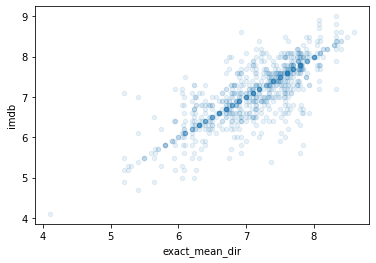

In [ ]:
# using scatter plot observe the correlations between other attributes of df and imdb ratings 
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='exact_mean_dir',y='imdb',alpha=0.1)


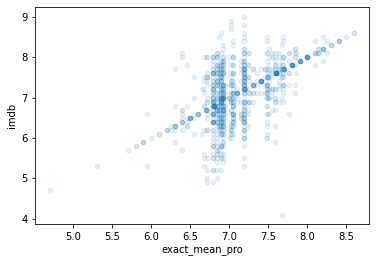

In [ ]:
df.plot(kind='scatter',x='exact_mean_pro',y='imdb',alpha=0.1)

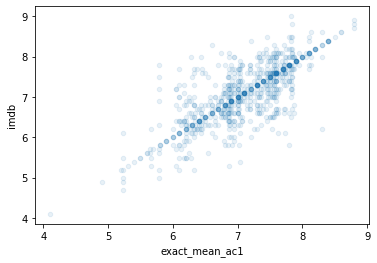

In [ ]:
df.plot(kind='scatter',x='exact_mean_ac1',y='imdb',alpha=0.1)

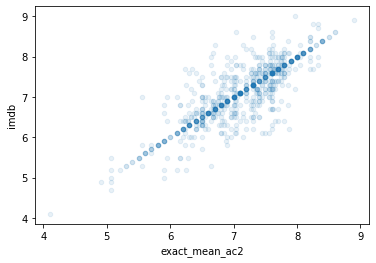

In [ ]:
df.plot(kind='scatter',x='exact_mean_ac2',y='imdb',alpha=0.1)

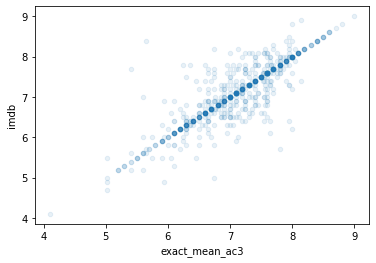

In [ ]:
df.plot(kind='scatter',x='exact_mean_ac3',y='imdb',alpha=0.1)

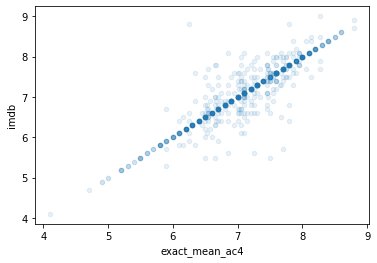

In [ ]:
df.plot(kind='scatter',x='exact_mean_ac4',y='imdb',alpha=0.1)

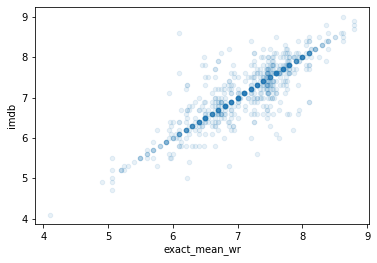

In [ ]:
df.plot(kind='scatter',x='exact_mean_wr',y='imdb',alpha=0.1)

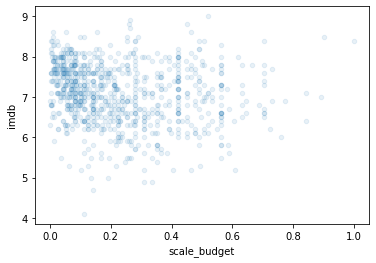

In [ ]:
df.plot(kind='scatter',x='scale_budget',y='imdb',alpha=0.1)

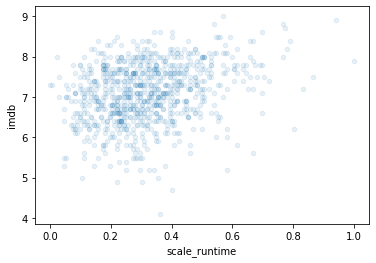

In [ ]:
df.plot(kind='scatter',x='scale_runtime',y='imdb',alpha=0.1)

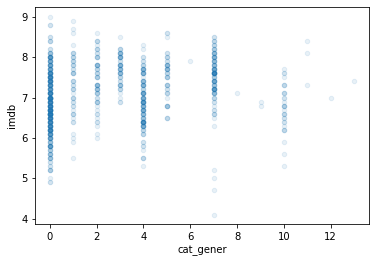

In [ ]:
df.plot(kind='scatter',x='cat_gener',y='imdb',alpha=0.1)

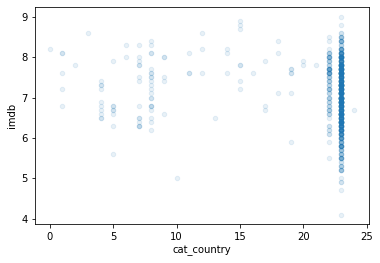

In [ ]:
df.plot(kind='scatter',x='cat_country',y='imdb',alpha=0.1)

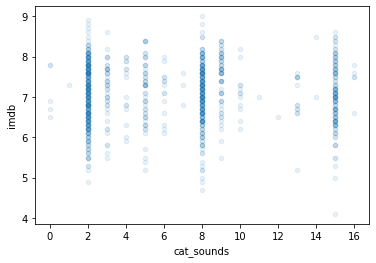

In [ ]:
df.plot(kind='scatter',x='cat_sounds',y='imdb',alpha=0.1)

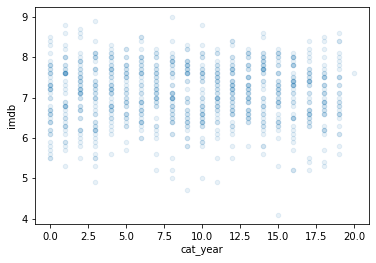

In [ ]:
df.plot(kind='scatter',x='cat_year',y='imdb',alpha=0.1)

In [ ]:
#load all the inputs and output to X and y variables
X = df[['exact_mean_dir',	'exact_mean_pro',	'exact_mean_ac1',	'exact_mean_ac2',	'exact_mean_ac3',	'exact_mean_ac4',	'exact_mean_wr',	'scale_budget' ,	'scale_runtime'	,'cat_gener' ,	'cat_country' ,'cat_sounds'	,'cat_year']]
y = df['imdb_class']

In [ ]:
# crate train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7 , stratify=y)




## **1.TRAIN THE DATA SET USING RANDOM FOREST MODEL**








In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 120) #number of  decision trees we make and also high number of trees gives high accuracy but model will be slow
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## *MEASSURE THE ACUURACY OF RANDOM FOREST MODEL*




In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 16   0   0]
 [  1 197   5]
 [  0   2  30]]
Classification Report:
              precision    recall  f1-score   support

       [4-6)       0.94      1.00      0.97        16
       [6-8)       0.99      0.97      0.98       203
      [8-10]       0.86      0.94      0.90        32

    accuracy                           0.97       251
   macro avg       0.93      0.97      0.95       251
weighted avg       0.97      0.97      0.97       251



# **2.TRAIN THE DATA SET USING KNN MODEL** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

## *MEASSURE THE ACUURACY OF KNN MODEL*

In [ ]:
y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[  5  11   0]
 [  0 198   5]
 [  0  29   3]]
Classification Report:
              precision    recall  f1-score   support

       [4-6)       1.00      0.31      0.48        16
       [6-8)       0.83      0.98      0.90       203
      [8-10]       0.38      0.09      0.15        32

    accuracy                           0.82       251
   macro avg       0.74      0.46      0.51       251
weighted avg       0.78      0.82      0.78       251



# **3.TRAIN THE DATA SET DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## *MEASSURE THE ACUURACY OF DECISION TREE MODEL*

In [ ]:
y_pred = clf.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 16   0   0]
 [  3 189  11]
 [  0   2  30]]
Classification Report:
              precision    recall  f1-score   support

       [4-6)       0.84      1.00      0.91        16
       [6-8)       0.99      0.93      0.96       203
      [8-10]       0.73      0.94      0.82        32

    accuracy                           0.94       251
   macro avg       0.85      0.96      0.90       251
weighted avg       0.95      0.94      0.94       251



# **4.TRAIN THE DATA SET USING SOFTMAX REGRESSION MODEL**

In [ ]:
from sklearn import linear_model
sofreg = linear_model.LogisticRegression(multi_class='multinomial',  max_iter=400)
sofreg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## *MEASSURE THE ACUURACY OF SOFTMAX REGRESSION MODEL*

In [ ]:
y_pred = sofreg.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 11   5   0]
 [  0 196   7]
 [  0  12  20]]
Classification Report:
              precision    recall  f1-score   support

       [4-6)       1.00      0.69      0.81        16
       [6-8)       0.92      0.97      0.94       203
      [8-10]       0.74      0.62      0.68        32

    accuracy                           0.90       251
   macro avg       0.89      0.76      0.81       251
weighted avg       0.90      0.90      0.90       251

